In [2]:
import pandas as pd 
import numpy as np  
import random
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
%store -r train_x
%store -r test_x
%store -r train_y
%store -r test_y

%store -r train_x_two_features
%store -r test_x_two_features
%store -r train_y_two_features
%store -r test_y_two_features

%store -r transformed_train_x
%store -r transformed_test_x

%store -r lda_train_x
%store -r lda_test_x

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
def run_random_forest_classifier(train_x, test_x, train_y, test_y):
    error_rate = []
    nvals = range(1,301,30)
    for i in nvals:
        rfc = RandomForestClassifier(n_estimators=i)
        rfc.fit(train_x,train_y)
        pred_y_i = rfc.predict(test_x)
        error_rate.append(np.mean(pred_y_i != test_y))
    plt.plot(nvals, error_rate, color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. N Estimators')
    plt.xlabel('N Estimators')
    plt.ylabel('Error Rate')
    plt.show()
    nloc = error_rate.index(min(error_rate))
    print('Lowest error of %s occurs at n=%s.' % (error_rate[nloc], nvals[nloc]))
    print('The highest in-sample accuracy in Random Forest is %s when n=%s.' % (1-error_rate[nloc], nvals[nloc]))
    # Using our optimal k value, we will run the analysis again and proceed to quantify our classification accuracy
    rfc = RandomForestClassifier(n_estimators= nvals[nloc])
    rfc.fit(train_x,train_y)
    scores = cross_val_score(rfc, test_x, test_y, cv=5)
    print('Out-of-sample accuracy in Random Forest:%.10f' % scores.mean())

Run random forest with all features(Built-in Algorithm):


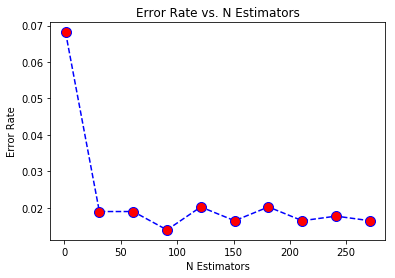

Lowest error of 0.0138888888889 occurs at n=91.
The highest in-sample accuracy in Random Forest is 0.986111111111 when n=91.
Out-of-sample accuracy in Random Forest:0.9709577263

Run random forest with dimensionality reduction using PCA(Built-in Algorithm)


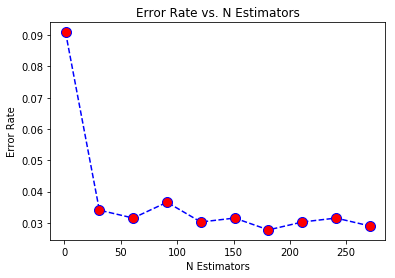

Lowest error of 0.0277777777778 occurs at n=181.
The highest in-sample accuracy in Random Forest is 0.972222222222 when n=181.
Out-of-sample accuracy in Random Forest:0.9684340419

Run random forest with top 2 features(Built-in Algorithm):


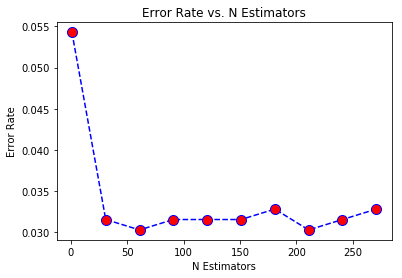

Lowest error of 0.030303030303 occurs at n=61.
The highest in-sample accuracy in Random Forest is 0.969696969697 when n=61.
Out-of-sample accuracy in Random Forest:0.9696839424
Run random forest with dimensionality reduction using LDA(Built-in Algorithm)


NameError: name 'lda_train_x' is not defined

In [5]:
print("Run random forest with all features(Built-in Algorithm):")
run_random_forest_classifier(train_x, test_x, train_y, test_y)
print("===============================================================================\n")
print("Run random forest with dimensionality reduction using PCA(Built-in Algorithm)")
run_random_forest_classifier(transformed_train_x, transformed_test_x, train_y, test_y)
print("===============================================================================\n")
print("Run random forest with top 2 features(Built-in Algorithm):")
run_random_forest_classifier(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)

print("Run random forest with dimensionality reduction using LDA(Built-in Algorithm)")
run_random_forest_classifier(lda_train_x, lda_test_x, train_y, test_y)
print("===========================================================")

